Let's first install requirements

In [1]:
# %conda update --all

In [2]:
%matplotlib inline

## Initialization of the libraries/variables

In [3]:
import os

import numpy as np
import torch
torch.manual_seed(42*42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

import matplotlib.pyplot as plt
# matplotlib parameters
fig_width = 20
phi = (np.sqrt(5)+1)/2 # golden ratio for the figures :-)

In [4]:
im_shift_X, im_shift_Y = 0, 27
image_size = 257

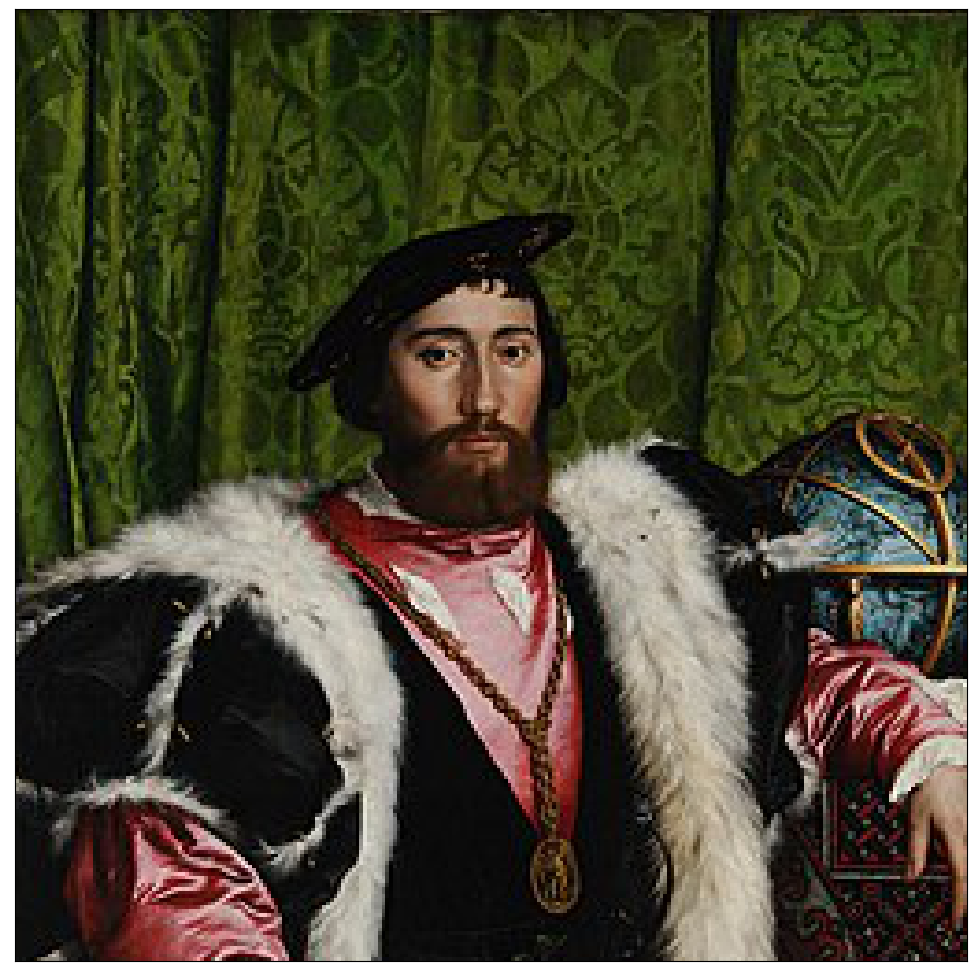

In [5]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg'
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg/608px-Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg'
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# import imageio
import imageio.v2 as imageio

image = imageio.imread(image_url)[im_shift_X:im_shift_X+image_size, im_shift_Y:im_shift_Y+image_size, :]

fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [6]:
image = image/255

In [7]:
torch.movedim(torch.randn(1, 2, 3), (0, 1, 2), (1, 2, 0)).shape

torch.Size([3, 1, 2])

In [8]:
image_tens = torch.from_numpy(image)
# swap from H, W, C (numpy) to C, H, W (torch)
image_tens = torch.movedim(image_tens, (0, 1, 2), (1, 2, 0))
image.shape, image_tens.shape

((257, 257, 3), torch.Size([3, 257, 257]))

In [9]:
rs_ = torch.logspace(0, -4, image_size, base = 2)
ts_ = torch.linspace(-torch.pi, torch.pi, image_size+1)[:-1]

grid_xs = torch.outer(rs_, -torch.cos(ts_)) 
grid_ys = torch.outer(rs_, torch.sin(ts_)) 

logPolar_grid = torch.stack((grid_xs, grid_ys), 2)
logPolar_grid = logPolar_grid.unsqueeze(0) # add batch dim
grid_xs.shape, grid_ys.shape, logPolar_grid.shape

(torch.Size([257, 257]), torch.Size([257, 257]), torch.Size([1, 257, 257, 2]))

https://pytorch.org/docs/stable/generated/torch.nn.functional.grid_sample.html

In [10]:
import torch.nn.functional as F
# F.grid_sample?

In [11]:
image_ret_tens = F.grid_sample(image_tens.unsqueeze(0).float(), logPolar_grid, align_corners=False, padding_mode='border')
image_ret_tens.shape

torch.Size([1, 3, 257, 257])

In [12]:
torch.movedim(torch.randn(1, 2, 3), (1, 2, 0), (0, 1, 2)).shape

torch.Size([2, 3, 1])

In [13]:
image_ret_tens = image_ret_tens.squeeze(0)
# swap from C, H, W (torch) to H, W, C (numpy)
image_ret_tens = torch.movedim(image_ret_tens, (1, 2, 0), (0, 1, 2))
image_ret = image_ret_tens.numpy()

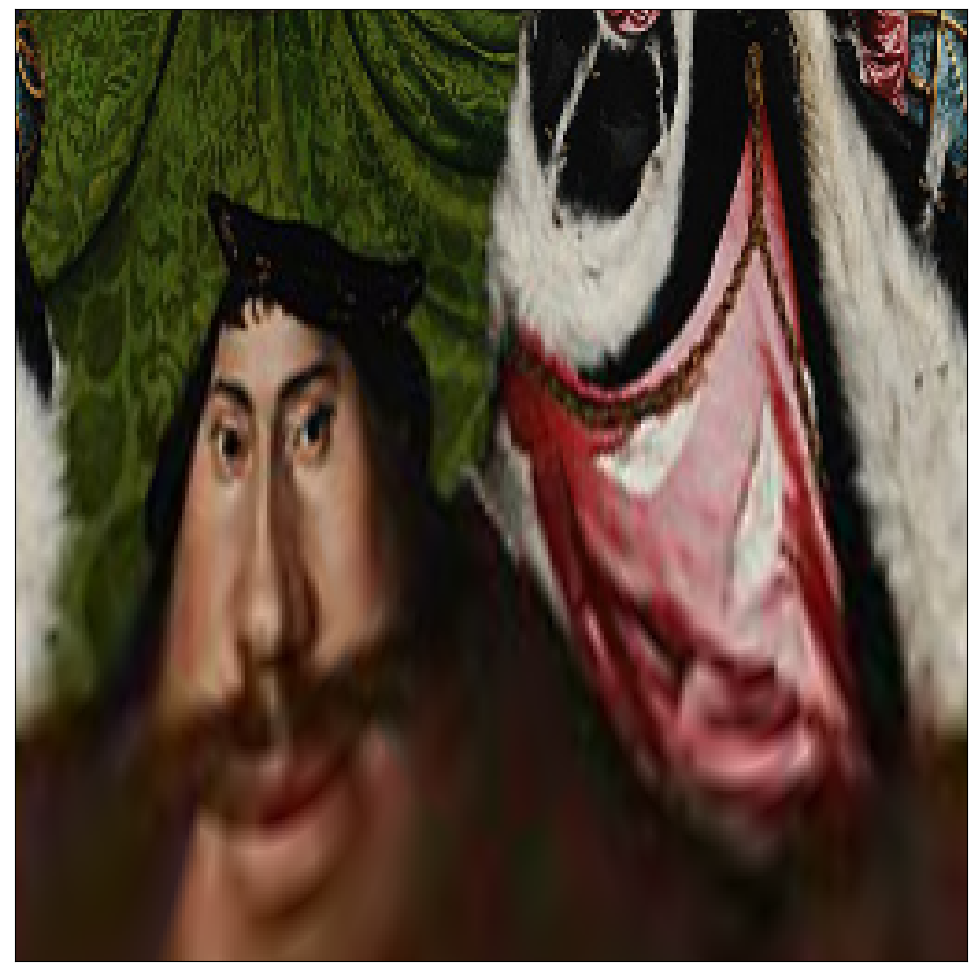

In [14]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image_ret)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [15]:
image_grid_size = 8
image_grid_tens = torch.ones((3, image_size, image_size)).float()
image_grid_tens[0:2, ::image_grid_size, :] = 0
image_grid_tens[1:3, :, ::image_grid_size] = 0
fovea_size = 5 
image_grid_tens[:, (image_size//2-image_grid_size*fovea_size):(image_size//2+image_grid_size*fovea_size), (image_size//2-image_grid_size*fovea_size):(image_size//2+image_grid_size*fovea_size)] *= .5
image_grid_tens.shape, image_grid_tens.unsqueeze(0).shape

(torch.Size([3, 257, 257]), torch.Size([1, 3, 257, 257]))

In [16]:
image_grid_ret_tens = F.grid_sample(image_grid_tens.unsqueeze(0).float(), logPolar_grid, align_corners=False, padding_mode='border')
image_grid_ret_tens.shape

torch.Size([1, 3, 257, 257])

In [17]:
image_grid_tens = image_grid_tens.squeeze(0)
# swap from C, H, W (torch) to H, W, C (numpy)
image_grid_tens = torch.movedim(image_grid_tens, (1, 2, 0), (0, 1, 2))
image_grid = image_grid_tens.numpy()
image_grid.shape

(257, 257, 3)

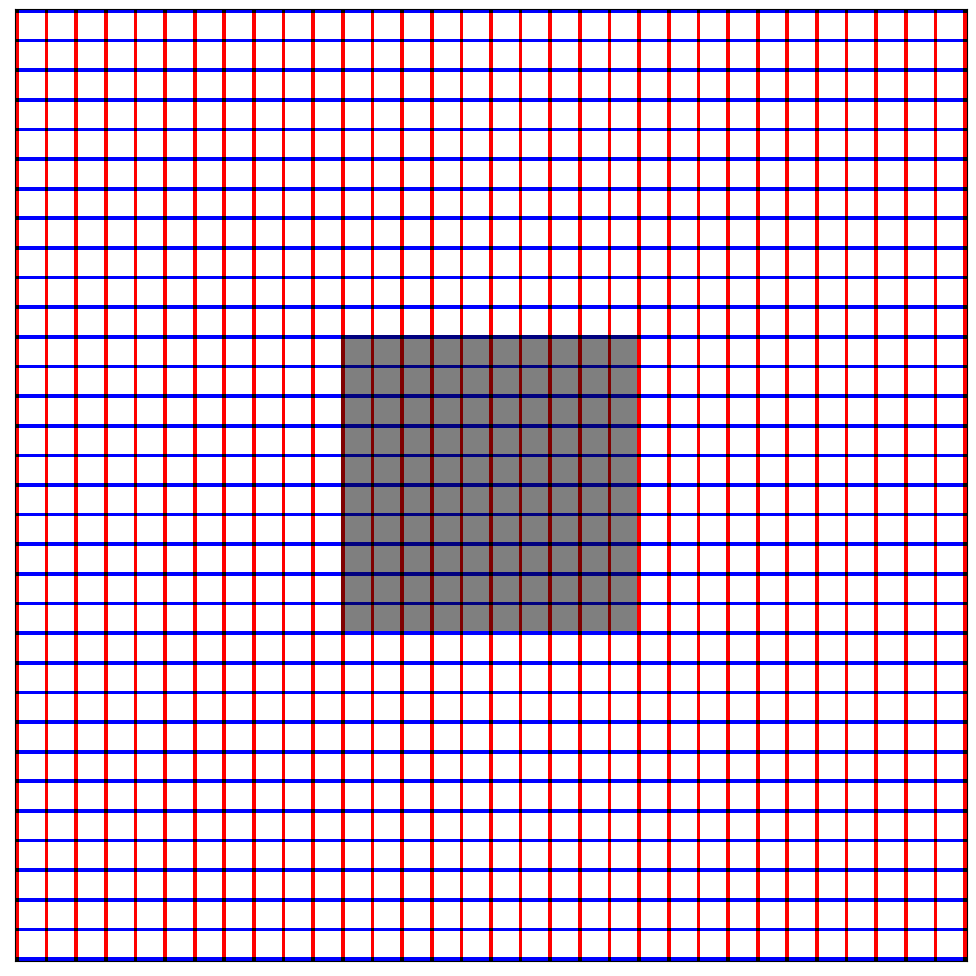

In [18]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image_grid)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [19]:
image_grid_ret_tens = image_grid_ret_tens.squeeze(0)
# swap from C, H, W (torch) to H, W, C (numpy)
image_grid_ret_tens = torch.movedim(image_grid_ret_tens, (1, 2, 0), (0, 1, 2))
image_grid_ret = image_grid_ret_tens.numpy()

image_grid_ret.shape

(257, 257, 3)

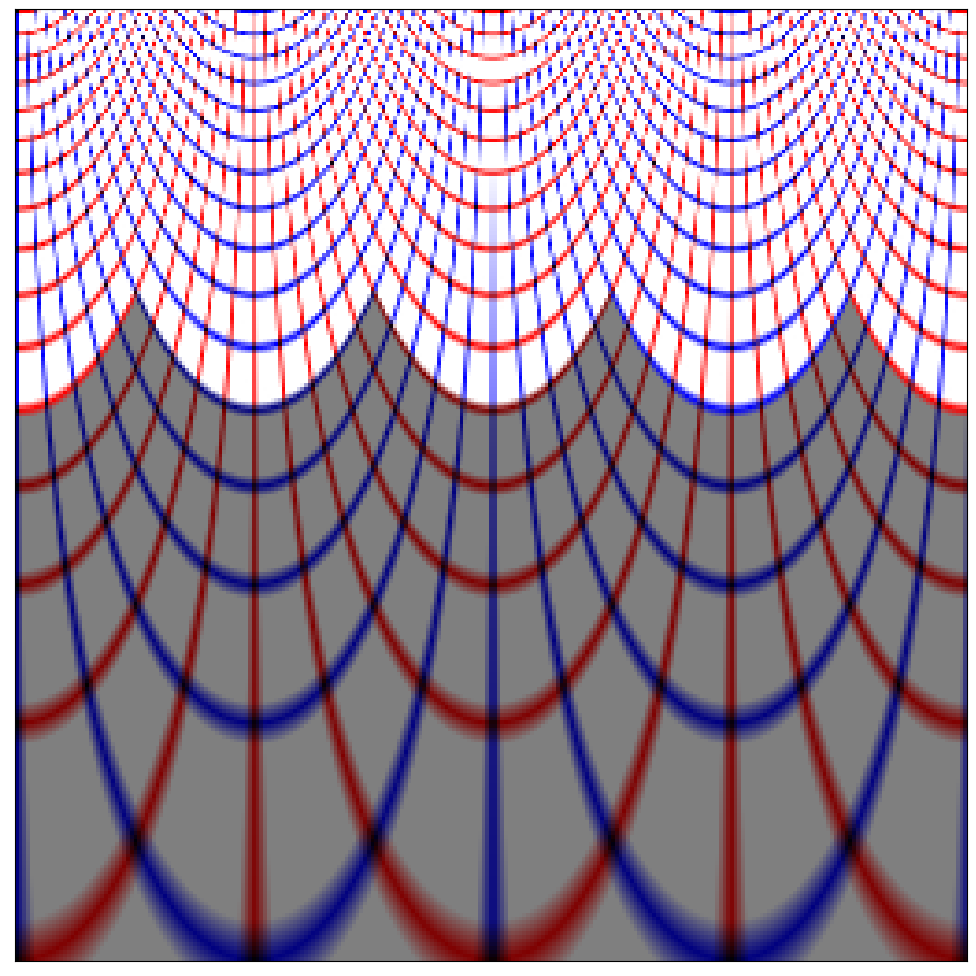

In [20]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image_grid_ret)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

## summary

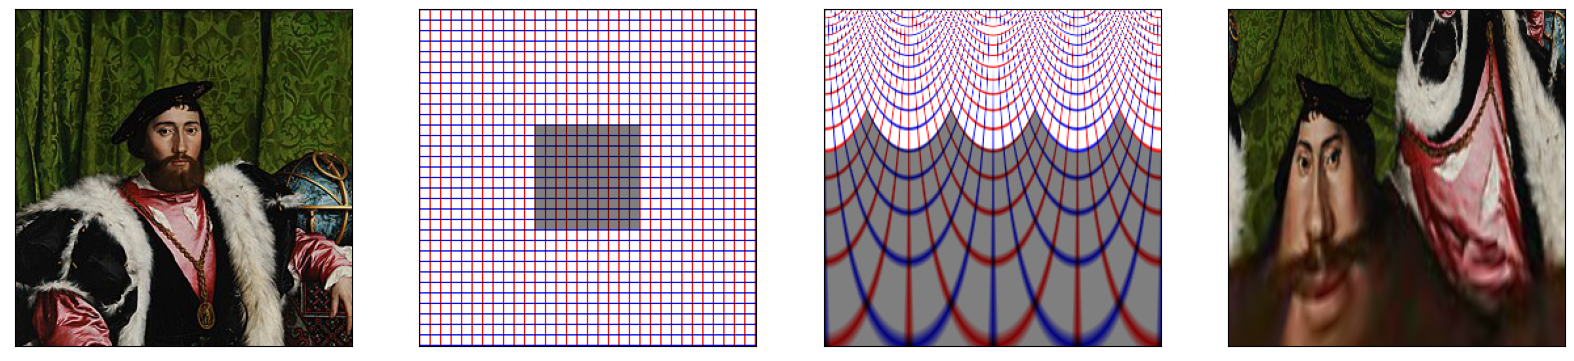

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(fig_width, fig_width/phi))
axs[0].imshow(image)
axs[1].imshow(image_grid)
axs[2].imshow(image_grid_ret)
axs[3].imshow(image_ret)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])  
fig.set_facecolor(color='white')
fig.savefig('retinotopy.png', dpi=300, bbox_inches='tight', pad_inches=0, edgecolor=None)